In [1]:
import cv2

# Get frames

In [8]:
vidcap = cv2.VideoCapture('masked_video.mp4')
success,image = vidcap.read()
count = 0
while success:
    cv2.imwrite("frame_folder/frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    print(image.shape)
    print('Read a new frame: ', success)
    count += 1

(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True
(1080, 1920, 3)
Read a new frame:  True


AttributeError: 'NoneType' object has no attribute 'shape'

# Get Mask

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
mask = np.zeros(((1080, 1920, 3)), np.uint8)

In [56]:
mask = cv2.fillConvexPoly(mask, np.array([[1300,60], [835,328], [660,1050], [1444,1020],
                          [1670,1077],[1740,945], [945, 670], [1085,510], [1600, 500]],  'int32'), (255,255,255))

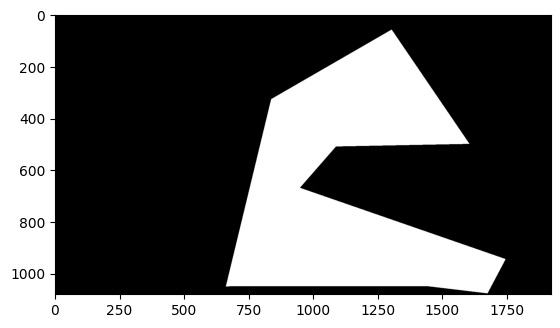

In [57]:
plt.imshow(mask)

In [25]:
cv2.imwrite('mask_folder/mask.jpg', mask)

True

# Resize Image and Mask

In [3]:
from PIL import Image
import os

In [69]:
for i in os.listdir('frame_folder'):
    image = Image.open('frame_folder/' + i)
    image = np.array(image)
    image = cv2.fillConvexPoly(image, np.array([[1300,60], [835,328], [660,1050], [1444,1020],
                          [1670,1077],[1740,945], [945, 670], [1085,510], [1600, 500]],  'int32'), (255,255,255))
    image = Image.fromarray(image)
    image = image.resize((1024, 1024))
    image.save('frame_folder_1024_size/' + i)

# Create video after Inpaiting

In [4]:
image_imp = []
for i in range(0,131):
    image_imp.append('results/frame' + str(i) + '_GPEN.jpg')

In [5]:
image_imp

['results/frame0_GPEN.jpg',
 'results/frame1_GPEN.jpg',
 'results/frame2_GPEN.jpg',
 'results/frame3_GPEN.jpg',
 'results/frame4_GPEN.jpg',
 'results/frame5_GPEN.jpg',
 'results/frame6_GPEN.jpg',
 'results/frame7_GPEN.jpg',
 'results/frame8_GPEN.jpg',
 'results/frame9_GPEN.jpg',
 'results/frame10_GPEN.jpg',
 'results/frame11_GPEN.jpg',
 'results/frame12_GPEN.jpg',
 'results/frame13_GPEN.jpg',
 'results/frame14_GPEN.jpg',
 'results/frame15_GPEN.jpg',
 'results/frame16_GPEN.jpg',
 'results/frame17_GPEN.jpg',
 'results/frame18_GPEN.jpg',
 'results/frame19_GPEN.jpg',
 'results/frame20_GPEN.jpg',
 'results/frame21_GPEN.jpg',
 'results/frame22_GPEN.jpg',
 'results/frame23_GPEN.jpg',
 'results/frame24_GPEN.jpg',
 'results/frame25_GPEN.jpg',
 'results/frame26_GPEN.jpg',
 'results/frame27_GPEN.jpg',
 'results/frame28_GPEN.jpg',
 'results/frame29_GPEN.jpg',
 'results/frame30_GPEN.jpg',
 'results/frame31_GPEN.jpg',
 'results/frame32_GPEN.jpg',
 'results/frame33_GPEN.jpg',
 'results/frame34_GPEN.j

In [43]:
import cv2
import os

image_folder = 'images'
video_name = 'videoAfterInpaiting.mp4'

frame = cv2.imread(image_imp[0])
print(frame.shape)
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc(*'MP4V')

video = cv2.VideoWriter(video_name, 0x7634706d ,20, (width,height))

for image in image_imp:
    video.write(cv2.imread(image))

    
video.release()

cv2.destroyAllWindows()


(1024, 1024, 3)


In [ ]:
# 